# CNN minvan


In [1]:
import tensorflow as tf
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageOps
import math

# tf.debugging.set_log_device_placement(True)

In [2]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Training model 

In [4]:
train_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_datas_vans_others/train'
val_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_datas_vans_others/val'
test_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_datas_vans_others/test'
img_height = 224
img_width = 224
batch_size = 16

In [5]:
# train data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    label_mode='categorical',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# val data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    label_mode='categorical',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# test data set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    label_mode='categorical',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print(class_names)

Found 1295 files belonging to 2 classes.
Found 835 files belonging to 2 classes.
Found 658 files belonging to 2 classes.
['minivan', 'notminivan']


In [6]:
img_shape= (224, 224, 3)
class_num = len(class_names)
model_epochs = 100

In [7]:
# setup cnn model
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=img_shape),
        
    # convolution layer channle 32 kernel 3*3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

    # pooling layer kernel 2*2
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # convolution layer channle 64 kernel 3*3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    # pooling layer kernel 2*2
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    # The same 128 dense layers, and 10 output layers as in the pre-convolution:
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(class_num, activation='softmax')
    ])

cnn_model.summary()
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [8]:
# CPU too slow
# with tf.device('/CPU:0'):    
#     start = time()
#     history = cnn_model.fit(train_ds, validation_data=val_ds, epochs=model_epochs)
#     cnn_model.save('models/cnn_van_cpu.h5')
#     end = time()
#     print('cnn model(GPU) fit took {:.3f} seconds'.format(end - start))

In [1957]:
# with tf.device('/GPU:0'):
#     start = time()
#     history = cnn_model.fit(train_ds, validation_data=val_ds, epochs=model_epochs)
#     cnn_model.save('models/cnn_van_gpu.h5')
#     end = time()
#     print('cnn model(GPU) fit took {:.3f} seconds'.format(end - start))

Epoch 1/100
81/81 [==============================] - 4s 38ms/step - loss: 0.6961 - accuracy: 0.5714 - val_loss: 0.6630 - val_accuracy: 0.5305
Epoch 2/100
81/81 [==============================] - 3s 35ms/step - loss: 0.6262 - accuracy: 0.6579 - val_loss: 0.5573 - val_accuracy: 0.7329
Epoch 3/100
81/81 [==============================] - 3s 35ms/step - loss: 0.5885 - accuracy: 0.6772 - val_loss: 0.5651 - val_accuracy: 0.6994
Epoch 4/100
81/81 [==============================] - 3s 35ms/step - loss: 0.5598 - accuracy: 0.7004 - val_loss: 0.4993 - val_accuracy: 0.7389
Epoch 5/100
81/81 [==============================] - 3s 35ms/step - loss: 0.5350 - accuracy: 0.7320 - val_loss: 0.4796 - val_accuracy: 0.7689
Epoch 6/100
81/81 [==============================] - 3s 35ms/step - loss: 0.5202 - accuracy: 0.7429 - val_loss: 0.4834 - val_accuracy: 0.7725
Epoch 7/100
81/81 [==============================] - 3s 35ms/step - loss: 0.4818 - accuracy: 0.7722 - val_loss: 0.4253 - val_accuracy: 0.8192
Epoch 

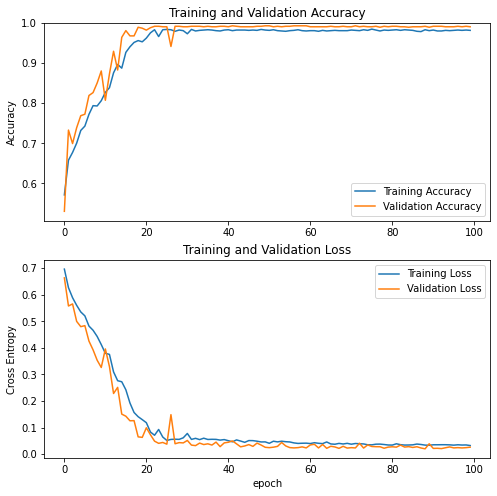

In [1958]:
# draw loss and acc
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Testing model

In [9]:
# load model
test_cnn_model = tf.keras.models.load_model('models_backup/cnn_van_gpu.h5')
loss, accuracy = test_cnn_model.evaluate(test_ds)
# loss, accuracy = cnn_model.evaluate(test_ds)
print('cnn test accuracy: ', accuracy)

42/42 [==============================] - 7s 16ms/step - loss: 0.0368 - accuracy: 0.9924
cnn test accuracy:  0.9924012422561646


In [9]:
# use model to predict
test_real_labels = []
test_pre_labels = []
for test_batch_images, test_batch_labels in test_ds:
    test_batch_labels = test_batch_labels.numpy()
    test_batch_pres = test_cnn_model.predict(test_batch_images)
    # print(test_batch_pres)

    test_batch_labels_max = np.argmax(test_batch_labels, axis=1)
    test_batch_pres_max = np.argmax(test_batch_pres, axis=1)
    # print(test_batch_labels_max)
    # print(test_batch_pres_max)
    
    # take labels
    for i in test_batch_labels_max:
        test_real_labels.append(i)

    for i in test_batch_pres_max:
        test_pre_labels.append(i)

# print(test_real_labels)
# print(test_pre_labels)
class_names_length = len(class_names)
heat_maps = np.zeros((class_names_length, class_names_length))
for test_real_label, test_pre_label in zip(test_real_labels, test_pre_labels):
    heat_maps[test_real_label][test_pre_label] = heat_maps[test_real_label][test_pre_label] + 1

print(heat_maps)
heat_maps_sum = np.sum(heat_maps, axis=1).reshape(-1, 1)
# print(heat_maps_sum)
print()
heat_maps_float = heat_maps / heat_maps_sum
print(heat_maps_float)

[[323.   5.]
 [  0. 330.]]

[[0.9847561 0.0152439]
 [0.        1.       ]]


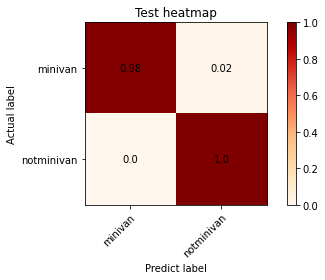

In [10]:
# draw heatmap
title = 'Test heatmap'
x_labels = class_names
y_labels = class_names
harvest = heat_maps_float

fig, ax = plt.subplots()
im = ax.imshow(harvest, cmap="OrRd")

# We want to show all ticks...
ax.set_xticks(np.arange(len(y_labels)))
ax.set_yticks(np.arange(len(x_labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(y_labels)
ax.set_yticklabels(x_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        text = ax.text(j, i, round(harvest[i, j], 2),
                       ha="center", va="center", color="black")
ax.set_xlabel("Predict label")
ax.set_ylabel("Actual label")
ax.set_title(title)
fig.tight_layout()
plt.colorbar(im)
plt.show()

### Prediction test

In [10]:
import sys
import cv2 as cv
from PIL import Image
import shutil

In [3029]:
# image preliminarily processing by opencv
img_name = '65.jpg'
img_dir = 'vans_test_image/' + img_name
target_img = 'image_temp/temp_img.' + img_dir.split(".")[-1]
shutil.copy(img_dir, target_img)
img_org = cv.imread(target_img)
img_sqr = cv.resize(img_org, (224, 224))
cv.imwrite('image_temp/img_sqr.png', img_sqr)

# input to the model
img_pred = Image.open('image_temp/img_sqr.png')
img_pred = np.asarray(img_pred) 
outputs = test_cnn_model.predict(img_pred.reshape(1, 224, 224, 3))
result_idx = int(np.argmax(outputs))
result_name = class_names[result_idx]
print('Model predict is : ', result_name)

Model predict is :  notminivan


## License Plate Recognition

In [3000]:
import imutils
import pytesseract

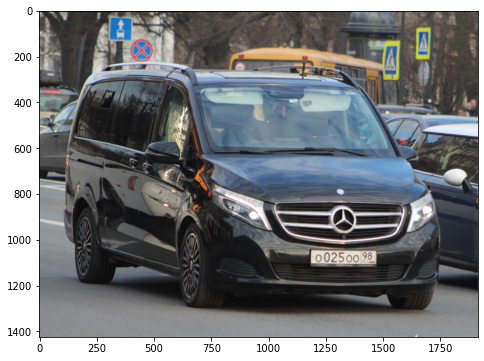

In [3001]:
plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))

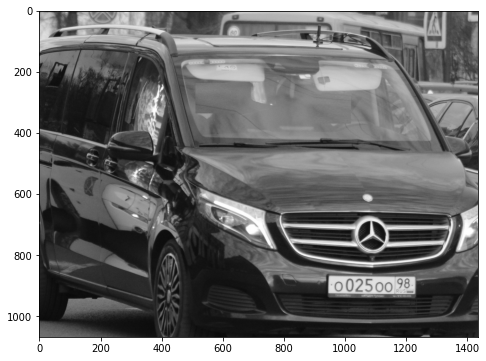

In [3002]:
# color to gray
# img_resize = cv.resize(img_org, (620, 480))
img_cut = img_org[int(img_org.shape[0] / 8):img_org.shape[0] - int(img_org.shape[0] / 8), 
                  int(img_org.shape[1] / 8):img_org.shape[1] - int(img_org.shape[1] / 8)]
img_gray = cv.cvtColor(img_cut, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB))

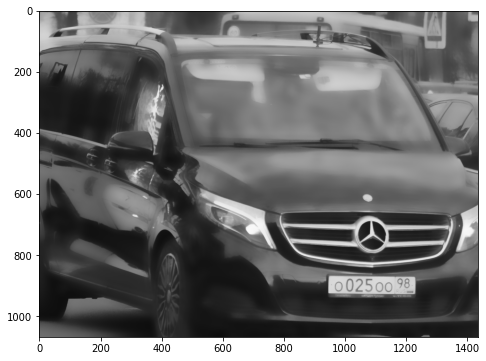

In [3003]:
# using bilateral filter better than gaussian blur
img_blur = cv.bilateralFilter(img_gray, 40, 40, 40)
img_gauss = cv.GaussianBlur(img_gray, (3, 3), 0, 0)

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_blur, cv.COLOR_BGR2RGB))

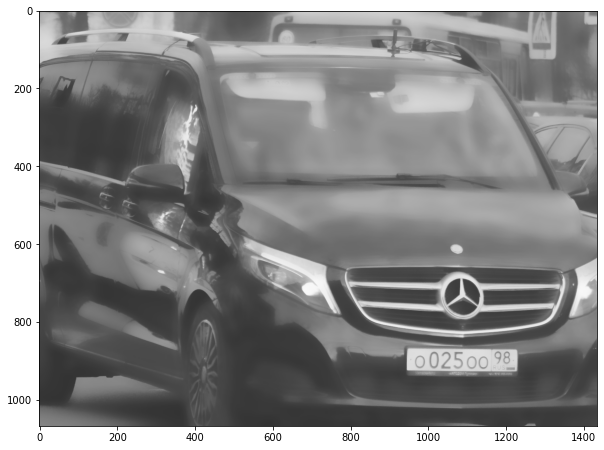

In [3004]:
img_norm = cv.normalize(img_blur, dst=None, alpha=50, beta=250, norm_type=cv.NORM_MINMAX)

plt.figure(figsize=(10, 16))
plt.imshow(cv.cvtColor(img_norm, cv.COLOR_BGR2RGB))

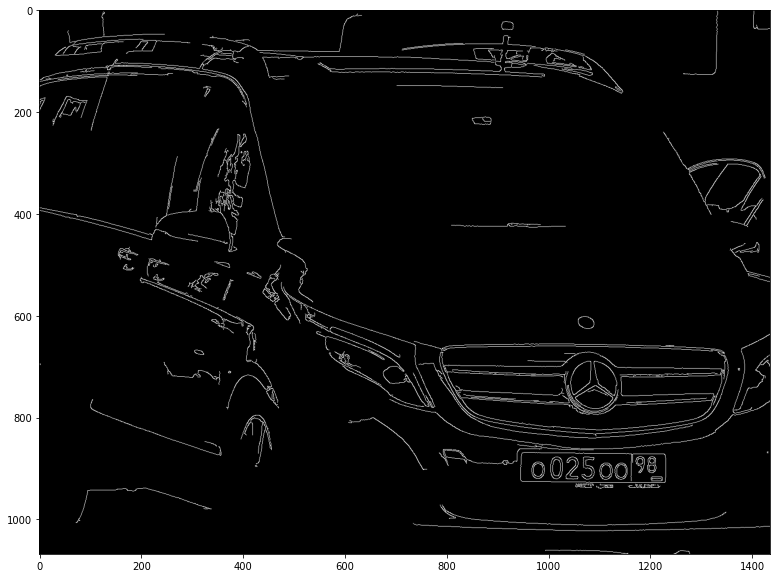

In [3005]:
# Canny
img_canny = cv.Canny(img_blur, 30, 280)

plt.figure(figsize=(16, 10))
plt.imshow(cv.cvtColor(img_canny, cv.COLOR_BGR2RGB))

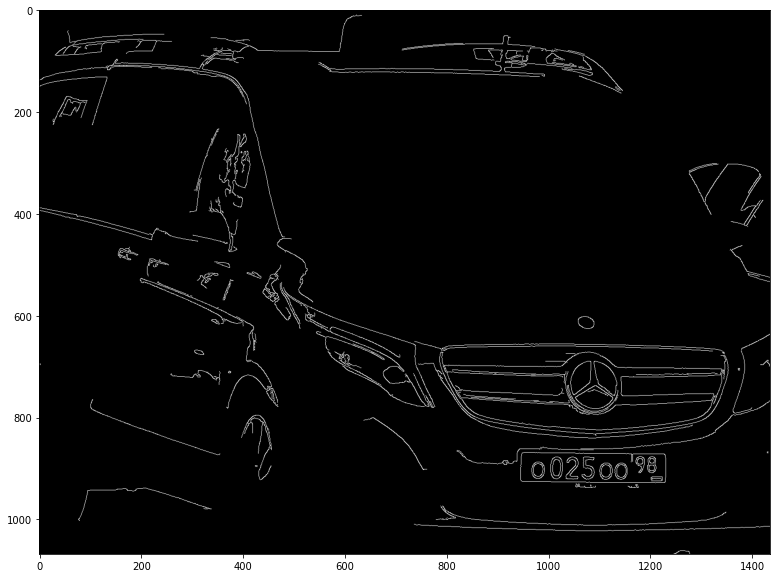

In [3006]:
# Canny
img_canny = cv.Canny(img_norm, 30, 280)

plt.figure(figsize=(16, 10))
plt.imshow(cv.cvtColor(img_canny, cv.COLOR_BGR2RGB))

In [3007]:
contours = cv.findContours(img_canny.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv.contourArea, reverse = True)[:20]
screenCnt = None

for c in contours:
    # approximate the contour
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

print(screenCnt)

[[[ 946  876]]

 [[ 948  925]]

 [[1229  926]]

 [[1227  871]]]


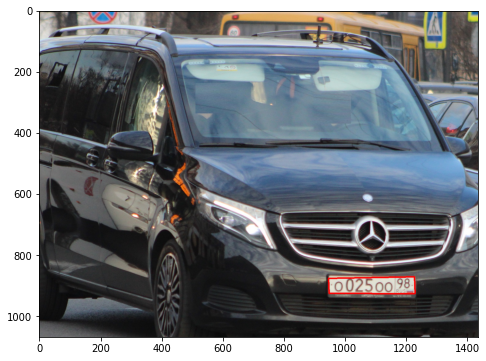

In [3008]:
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    img_cnt = cv.drawContours(img_cut, [screenCnt], -1, (0, 0, 255), 3)
    
plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_cnt, cv.COLOR_BGR2RGB))

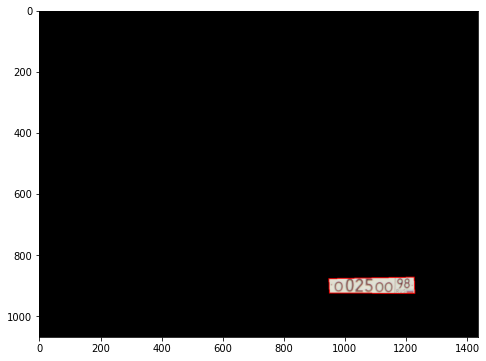

In [3009]:
# Masking the part other than the number plate
mask = np.zeros(img_gray.shape,np.uint8)
new_image = cv.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv.bitwise_and(img_cut, img_cut, mask=mask)

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))

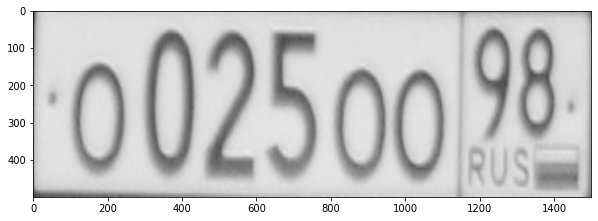

In [3010]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
img_cropped = img_gray[topx:bottomx + 1, topy:bottomy + 1]
img_cropped = cv.resize(img_cropped, 
                        (1500, 500))

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_cropped, cv.COLOR_BGR2RGB))

angle_rotation 0.0


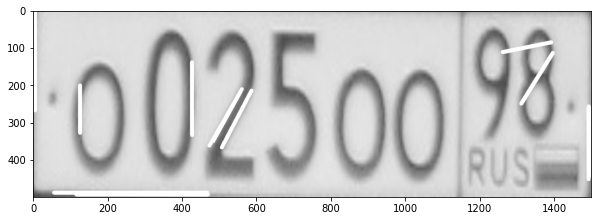

In [3011]:
img_crp_gauss = cv.GaussianBlur(img_cropped, (3, 3), 0, 0)
img_crp_canny = cv.Canny(img_crp_gauss, 30, 50)
img_crp_lines = cv.HoughLinesP(img_crp_canny, rho=3, theta=1 * np.pi/180, 
                               threshold=10, minLineLength=120, maxLineGap=30)
img_draw_lines = img_cropped.copy()

k = 0
if img_crp_lines is not None:
    for i in range(len(img_crp_lines)):
        for x1, y1, x2, y2 in img_crp_lines[i]:
            x = math.atan((y2-y1)/(x2-x1+1)) * 180 / np.pi
            if (-8 < x < 8):
                k = x
            cv.line(img_draw_lines, (x1, y1), (x2, y2), (255, 255, 255), 10)

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_draw_lines, cv.COLOR_BGR2RGB))

angle_rotation = k #math.atan(k) * 180 / np.pi
print('angle_rotation',angle_rotation)

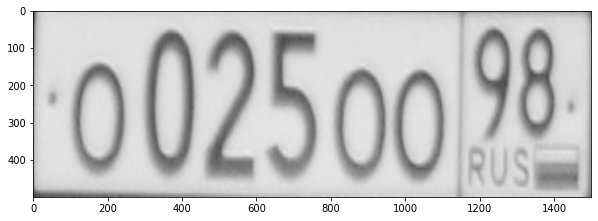

In [3012]:
if 1 < abs(angle_rotation) < 10:
    h, w = img_draw_lines.shape[:2]
    rotaion_matrix = cv.getRotationMatrix2D((w // 2, h // 2), angle_rotation, 1.1)
    img_cropped_rotation = cv.warpAffine(img_cropped, rotaion_matrix, (w, h))
else:
    img_cropped_rotation = img_cropped

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_cropped_rotation, cv.COLOR_BGR2RGB))

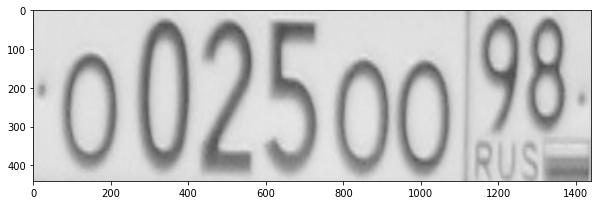

In [3013]:
# img_cropped_rotation = cv.resize(img_cropped_rotation, 
#                                  (5 * img_cropped_rotation.shape[1], 5 * img_cropped_rotation.shape[0]))
img_cropped_rotation = img_cropped_rotation[
    int(0.06 * img_cropped_rotation.shape[0]):int(img_cropped_rotation.shape[0] - 0.06 * img_cropped_rotation.shape[0]), 
    int(0.02 * img_cropped_rotation.shape[1]):int(img_cropped_rotation.shape[1] - 0.02 * img_cropped_rotation.shape[1])]

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_cropped_rotation, cv.COLOR_BGR2RGB))                        

In [3014]:
# save plate image
cv.imwrite('image_temp/img_plate_cropped.jpg', img_cropped_rotation)

True

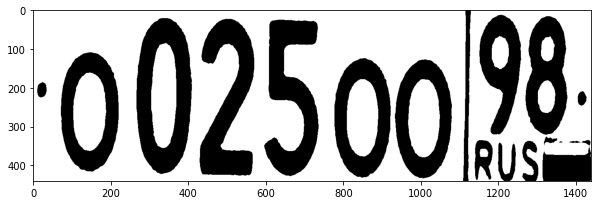

In [3015]:
# TO DO 
# Binarization
img_plate = img_cropped_rotation
# if np.prod(img_plate[:2]) > 7000:
#     ret, img_plate_binary = cv.threshold(
#         cv.normalize(img_plate, dst=None, alpha=150, beta=255, norm_type=cv.NORM_MINMAX), 
#         127, 255,cv.THRESH_BINARY)
# else:|
#     ret, img_plate_binary = cv.threshold(img_plate, 90, 255,cv.THRESH_BINARY)
ret, img_plate_binary = cv.threshold(cv.equalizeHist(img_plate), 88, 255,cv.THRESH_BINARY)

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_plate_binary, cv.COLOR_BGR2RGB))

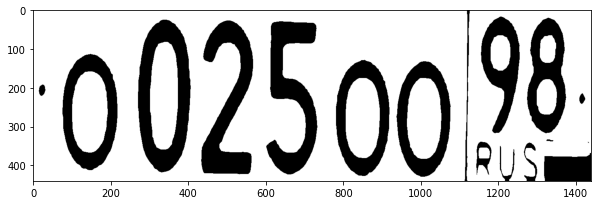

In [3016]:
kernel_1 = np.ones((3, 3), np.uint8)
kernel_2 = np.ones((10, 10), np.uint8)

img_plate_binary = cv.erode(img_plate_binary, kernel_1)
img_plate_binary = cv.dilate(img_plate_binary, kernel_2)

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_plate_binary, cv.COLOR_BGR2RGB))

In [3017]:
# Eliminate around edges
plate_contours, _ = cv.findContours(img_plate_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
borders = []

for c in plate_contours:
    x, y, w, h = cv.boundingRect(c)
    if w * h > 60:
        border = [(x, y), (x + w, y + h)]
        borders.append(border)
print(borders)

[[(1119, 0), (1440, 440)], [(0, 0), (1121, 440)]]


In [3018]:
# # fill edges
# for i, border in enumerate(borders):
#     cv.rectangle(img_plate_binary, border[0], border[1], (255, 255, 255), 10)

# plt.figure(figsize=(10, 6))
# plt.imshow(cv.cvtColor(img_plate_binary, cv.COLOR_BGR2RGB))

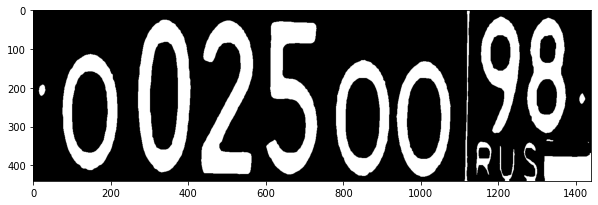

In [3019]:
# Reverse
img_plate_binary_reverse = 255 - img_plate_binary

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_plate_binary_reverse, cv.COLOR_BGR2RGB))

In [3020]:
# save reverse image
cv.imwrite('image_temp/img_plate_binary_reverse.jpg', img_plate_binary_reverse)

True

In [3021]:
plate_num_contours, _ = cv.findContours(img_plate_binary_reverse, 
                                        cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
borders_num = []

for c in plate_num_contours:
    x, y, w, h = cv.boundingRect(c)
    if w * h > 50:
        border = [(x, y), (x + w, y + h)]
        borders_num.append(border)
print(borders_num)

[[(1319, 368), (1440, 440)], [(1204, 350), (1243, 440)], [(1267, 341), (1301, 440)], [(1144, 339), (1183, 424)], [(1325, 333), (1343, 338)], [(1410, 214), (1425, 242)], [(15, 192), (32, 221)], [(938, 132), (1078, 429)], [(782, 128), (920, 427)], [(76, 113), (218, 412)], [(602, 29), (734, 423)], [(434, 27), (568, 423)], [(271, 25), (407, 418)], [(1275, 20), (1376, 317)], [(1156, 17), (1256, 317)], [(1114, 0), (1127, 440)]]


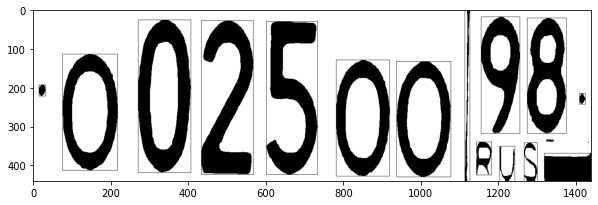

In [3022]:
for i, border in enumerate(borders_num):
    cv.rectangle(img_plate_binary, border[0], border[1], (0, 0, 0), 1)

plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(img_plate_binary, cv.COLOR_BGR2RGB))

In [3023]:
# border shape ((x1, y1),(x2, y2))
borders_num.sort()
for i, border in enumerate(borders_num):
    print(i, border[0], border[1])

0 (15, 192) (32, 221)
1 (76, 113) (218, 412)
2 (271, 25) (407, 418)
3 (434, 27) (568, 423)
4 (602, 29) (734, 423)
5 (782, 128) (920, 427)
6 (938, 132) (1078, 429)
7 (1114, 0) (1127, 440)
8 (1144, 339) (1183, 424)
9 (1156, 17) (1256, 317)
10 (1204, 350) (1243, 440)
11 (1267, 341) (1301, 440)
12 (1275, 20) (1376, 317)
13 (1319, 368) (1440, 440)
14 (1325, 333) (1343, 338)
15 (1410, 214) (1425, 242)


In [3024]:
# area mean
num_area = []
num_w_h = []
for border in borders_num:
    num_area.append((border[1][0] - border[0][0]) * (border[1][1] - border[0][1]))
    num_w_h.append([(border[1][0] - border[0][0]), (border[1][1] - border[0][1])])

var_area = np.var(num_area)
mean_area = np.mean(num_area)
num_w_h = np.array(num_w_h)
median_w = np.mean(num_w_h[:, 0])
median_h = np.mean(num_w_h[:, 1])
print(var_area)
print(mean_area)

if var_area > 2 * mean_area:
    for i in range(len(num_area) - 1, -1, -1):
        if num_area[i] < 0.4 * mean_area:
            borders_num.pop(i)
        
for i, border in enumerate(borders_num):
    print(i, border[0], border[1])

439027232.15234375
23090.1875
0 (76, 113) (218, 412)
1 (271, 25) (407, 418)
2 (434, 27) (568, 423)
3 (602, 29) (734, 423)
4 (782, 128) (920, 427)
5 (938, 132) (1078, 429)
6 (1156, 17) (1256, 317)
7 (1275, 20) (1376, 317)


In [3025]:
img_plate_binary_reverse = cv.imread('image_temp/img_plate_binary_reverse.jpg')

img_w = 32
img_h = 32
# border shape ((x1, y1),(x2, y2))
img_num_cropped_list = []
for i, border in enumerate(borders_num):
    img_num_cropped_list.append(
        img_plate_binary_reverse[border[0][1]:border[1][1], border[0][0]:border[1][0]])
    
    img_num_cropped_list[i] = cv.erode(img_num_cropped_list[i], kernel_2)
    # expand 37 pixl, resize img to 32*32
    img_out = ImageOps.expand(
        Image.fromarray(
            img_num_cropped_list[i]), border=37, fill=(0, 0, 0)).resize((img_w, img_h), Image.ANTIALIAS)
    img_out.save('image_temp/plate_num_cropped/' + 'cropped{:0>2d}.png'.format(i))

In [3026]:
img_plate_num = []

for i in range(len(img_num_cropped_list)):
    img_read = cv.imread('image_temp/plate_num_cropped/' + 'cropped{:0>2d}.png'.format(i), 1)
    
    number_of_white_pix = np.sum(img_read == 255)
    number_of_black_pix = np.sum(img_read == 0)
    
#     if (number_of_white_pix / number_of_black_pix) < 0.9:
    img_plate_num.append(img_read)
        
print(len(img_plate_num))

8


(32, 32, 3)
<class 'numpy.ndarray'>


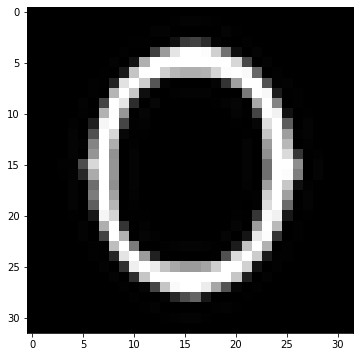

In [3027]:
print(img_plate_num[0].shape)
print(type(img_plate_num[0]))

plt.figure(figsize=(10, 6))
plt.imshow(Image.fromarray(img_plate_num[0]))

In [3028]:
test_num_cnn_model = tf.keras.models.load_model('models/cnn_num_gpu.h5')

num_outputs = []
num_result_idx = []
num_result_name = []

for i in range(len(img_plate_num)):
    num_outputs.append(test_num_cnn_model.predict(img_plate_num[i].reshape(1, img_w, img_h, 3)))
    num_result_idx.append(int(np.argmax(num_outputs[i])))
    num_result_name.append(class_num_names[num_result_idx[i]])

print('Lisence plate predict is :', ','.join(num_result_name).replace(',', ''))

Lisence plate predict is : 00250091


## CNN Number plate

In [110]:
train_num_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_data_num_alphabet/train'
val_num_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_data_num_alphabet/val'
test_num_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_data_num_alphabet/test'
img_num_height = 20
img_num_width = 20
batch_num_size = 16

In [112]:
# train num data set
train_num_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_num_data_dir,
    label_mode='categorical',
    seed=42,
#     color_mode='grayscale',
    image_size=(img_num_height, img_num_width),
    batch_size=batch_num_size
)

# val num data set
val_num_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_num_data_dir,
    label_mode='categorical',
    seed=42,
    #color_mode='grayscale',
    image_size=(img_num_height, img_num_width),
    batch_size=batch_num_size
)

# test num data set
test_num_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_num_data_dir,
    label_mode='categorical',
    seed=42,
    #color_mode='grayscale',
    image_size=(img_num_height, img_num_width),
    batch_size=batch_num_size
)

class_num_names = train_num_ds.class_names
print(class_num_names)

Found 30878 files belonging to 36 classes.
Found 13397 files belonging to 36 classes.
Found 4900 files belonging to 36 classes.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [113]:
img_num_shape= (20, 20, 3)
class_num_num = len(class_num_names)
num_model_epochs = 30

In [114]:
# setup num cnn model
num_cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=img_num_shape),
        
    # convolution layer channle 32 kernel 3*3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

    # pooling layer kernel 2*2
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # convolution layer channle 64 kernel 3*3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    # pooling layer kernel 2*2
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    # The same 128 dense layers, and 10 output layers as in the pre-convolution:
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(class_num_num, activation='softmax')
    ])

num_cnn_model.summary()
num_cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 20, 20, 3)         0         
                                                                 
 conv2d_50 (Conv2D)          (None, 18, 18, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_51 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_17 (Flatten)        (None, 576)             

In [22]:
with tf.device('/GPU:0'):
    start = time()
    num_history = num_cnn_model.fit(train_num_ds, validation_data=val_num_ds, epochs=num_model_epochs)
    num_cnn_model.save('models/cnn_num_gpu.h5')
    end = time()
    print('num cnn model(GPU) fit took {:.3f} seconds'.format(end - start))

Epoch 1/30
1353/1353 [==============================] - 10s 7ms/step - loss: 3.4884 - accuracy: 0.0837 - val_loss: 3.0530 - val_accuracy: 0.1185
Epoch 2/30
1353/1353 [==============================] - 10s 7ms/step - loss: 1.4961 - accuracy: 0.5960 - val_loss: 0.8249 - val_accuracy: 0.7585
Epoch 3/30
1353/1353 [==============================] - 10s 7ms/step - loss: 0.6379 - accuracy: 0.8099 - val_loss: 0.4921 - val_accuracy: 0.8526
Epoch 4/30
1353/1353 [==============================] - 10s 7ms/step - loss: 0.4735 - accuracy: 0.8550 - val_loss: 0.6848 - val_accuracy: 0.8326
Epoch 5/30
1353/1353 [==============================] - 10s 7ms/step - loss: 0.3875 - accuracy: 0.8754 - val_loss: 0.3805 - val_accuracy: 0.8725
Epoch 6/30
1353/1353 [==============================] - 10s 7ms/step - loss: 0.3302 - accuracy: 0.8919 - val_loss: 0.6206 - val_accuracy: 0.8162
Epoch 7/30
1353/1353 [==============================] - 10s 7ms/step - loss: 0.2983 - accuracy: 0.9028 - val_loss: 0.2892 - val_ac

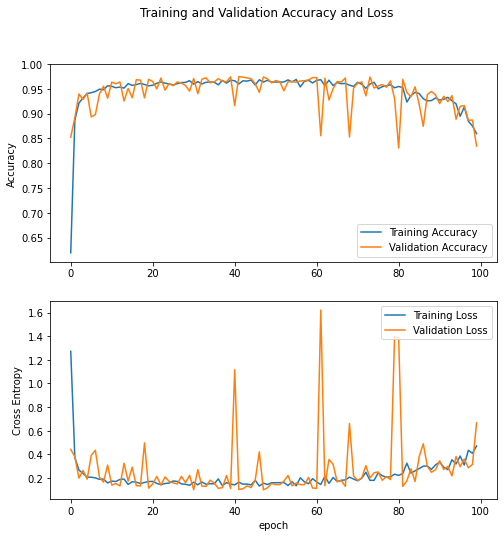

In [247]:
# draw loss and acc
acc = num_history.history['accuracy']
val_acc = num_history.history['val_accuracy']
loss = num_history.history['loss']
val_loss = num_history.history['val_loss']

# 
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.suptitle('Training and Validation Accuracy and Loss')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.suptitle('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
# load model
test_num_cnn_model = tf.keras.models.load_model('models/cnn_num_gpu.h5')
loss, accuracy = test_num_cnn_model.evaluate(test_num_ds)
print('cnn test accuracy: ', accuracy)

225/225 [==============================] - 1s 4ms/step - loss: 0.1658 - accuracy: 0.9481
cnn test accuracy:  0.9480555653572083


In [26]:
# use model to predict
test_real_labels = []
test_pre_labels = []
for test_batch_images, test_batch_labels in test_num_ds:
    test_batch_labels = test_batch_labels.numpy()
    test_batch_pres = test_num_cnn_model.predict(test_batch_images)
    # print(test_batch_pres)

    test_batch_labels_max = np.argmax(test_batch_labels, axis=1)
    test_batch_pres_max = np.argmax(test_batch_pres, axis=1)
    # print(test_batch_labels_max)
    # print(test_batch_pres_max)
    
    # take labels
    for i in test_batch_labels_max:
        test_real_labels.append(i)

    for i in test_batch_pres_max:
        test_pre_labels.append(i)

# print(test_real_labels)
# print(test_pre_labels)
class_names_length = len(class_num_names)
heat_maps = np.zeros((class_names_length, class_names_length))
for test_real_label, test_pre_label in zip(test_real_labels, test_pre_labels):
    heat_maps[test_real_label][test_pre_label] = heat_maps[test_real_label][test_pre_label] + 1

print(heat_maps)
heat_maps_sum = np.sum(heat_maps, axis=1).reshape(-1, 1)
# print(heat_maps_sum)
print()
heat_maps_float = heat_maps / heat_maps_sum
print(heat_maps_float)

[[ 76.   0.   0. ...   0.   0.   0.]
 [  0.  94.   0. ...   0.   0.   0.]
 [  0.   0.  98. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.   0.   0.]
 [  0.   0.   0. ...   0. 100.   0.]
 [  0.   1.   2. ...   0.   0.  93.]]

[[0.76 0.   0.   ... 0.   0.   0.  ]
 [0.   0.94 0.   ... 0.   0.   0.  ]
 [0.   0.   0.98 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   0.01 0.02 ... 0.   0.   0.93]]


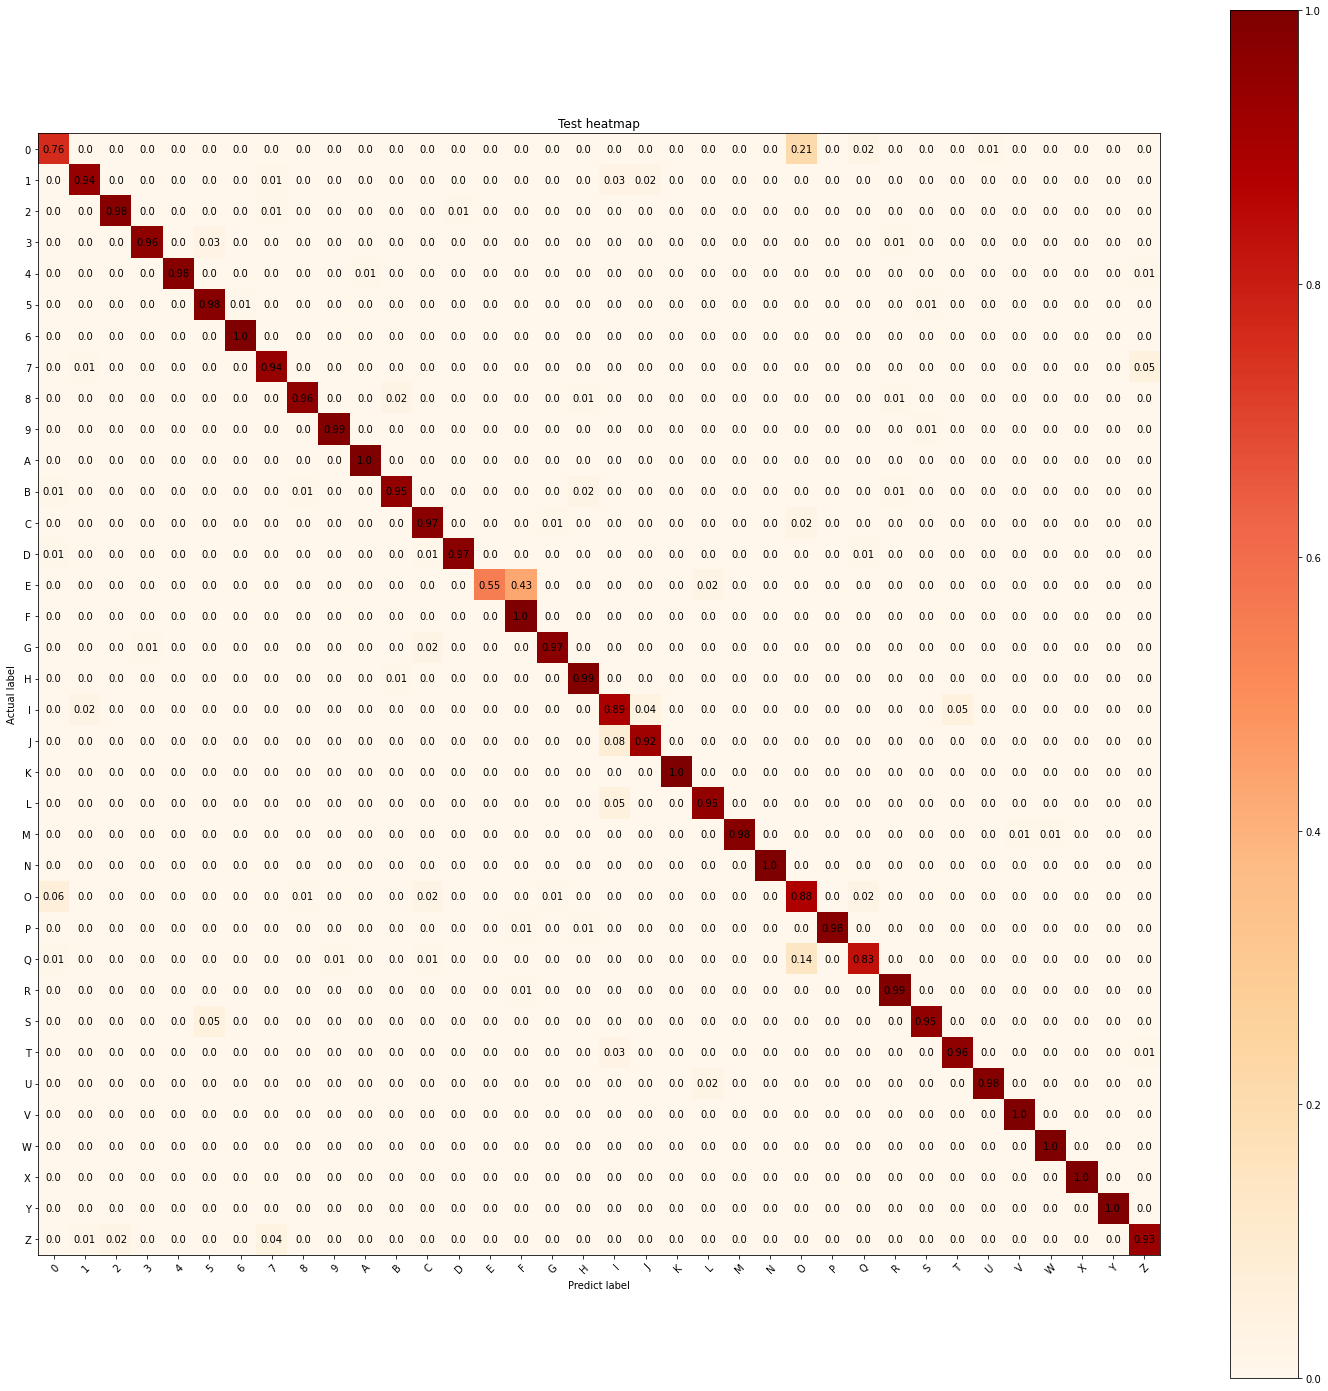

In [27]:
# draw heatmap
title = 'Test heatmap'
x_labels = class_num_names
y_labels = class_num_names
harvest = heat_maps_float

fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(harvest, cmap="OrRd")

# show all ticks...
ax.set_xticks(np.arange(len(y_labels)))
ax.set_yticks(np.arange(len(x_labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(y_labels)
ax.set_yticklabels(x_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        text = ax.text(j, i, round(harvest[i, j], 2),
                       ha="center", va="center", color="black")
ax.set_xlabel("Predict label")
ax.set_ylabel("Actual label")
ax.set_title(title)
fig.tight_layout()
plt.colorbar(im)
plt.show()

# Try new number model

In [252]:
train_num_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_data_num_alphabet/train'
val_num_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_data_num_alphabet/val'
test_num_data_dir = 'D:/ZerOIV/study/NeuralNetworks/split_data_num_alphabet/test'
img_num_height = 32
img_num_width = 32
batch_num_size = 16

In [253]:
# train num data set
train_num_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_num_data_dir,
    label_mode='categorical',
    seed=42,
#     color_mode='grayscale',
    image_size=(img_num_height, img_num_width),
    batch_size=batch_num_size
)

# val num data set
val_num_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_num_data_dir,
    label_mode='categorical',
    seed=42,
#     color_mode='grayscale',
    image_size=(img_num_height, img_num_width),
    batch_size=batch_num_size
)

# test num data set
test_num_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_num_data_dir,
    label_mode='categorical',
    seed=42,
#     color_mode='grayscale',
    image_size=(img_num_height, img_num_width),
    batch_size=batch_num_size
)

class_num_names = train_num_ds.class_names
print(class_num_names)

Found 34646 files belonging to 36 classes.
Found 15409 files belonging to 36 classes.
Found 7115 files belonging to 36 classes.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [254]:
img_num_shape= (32, 32, 3)
class_num_num = len(class_num_names)
num_model_epochs = 50

In [255]:
# setup num cnn model
num_cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=img_num_shape),
        
    # convolution layer channle 16 kernel 5*5
    tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3, name='bn0'),
    # pooling layer kernel 2*2
    tf.keras.layers.MaxPooling2D((2, 2), name='MaxPooling0'),
    
    # convolution layer channle 32 kernel 2*2
    tf.keras.layers.Conv2D(32, (2, 2), strides=(1, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3, name='bn1'),
    # pooling layer kernel 2*2
    tf.keras.layers.MaxPooling2D((2, 2), name='MaxPooling1'),
    
    # convolution layer channle 64 kernel 3*3
    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3, name='bn2'),
    # pooling layer kernel 2*2
    tf.keras.layers.MaxPooling2D((2, 2), name='MaxPooling2'),
    
    # flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(axis=1, name='bn3'),
    
    # The same 128 dense layers, and 10 output layers as in the pre-convolution:
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11, activation='relu'),
    
    tf.keras.layers.Dense(class_num_num, activation='softmax')
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)

num_cnn_model.summary()
num_cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_31 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_91 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 bn0 (BatchNormalization)    (None, 28, 28, 16)        64        
                                                                 
 MaxPooling0 (MaxPooling2D)  (None, 14, 14, 16)        0         
                                                                 
 conv2d_92 (Conv2D)          (None, 13, 13, 32)        2080      
                                                                 
 bn1 (BatchNormalization)    (None, 13, 13, 32)        128       
                                                                 
 MaxPooling1 (MaxPooling2D)  (None, 6, 6, 32)        

In [256]:
with tf.device('/GPU:0'):
    start = time()
    num_history = num_cnn_model.fit(train_num_ds, validation_data=val_num_ds, epochs=num_model_epochs)
    num_cnn_model.save('models/cnn_num_gpu.h5')
    end = time()
    print('num cnn model(GPU) fit took {:.3f} seconds'.format(end - start))

Epoch 1/50
2166/2166 [==============================] - 21s 10ms/step - loss: 1.1658 - accuracy: 0.6438 - val_loss: 0.4353 - val_accuracy: 0.8677
Epoch 2/50
2166/2166 [==============================] - 22s 10ms/step - loss: 0.3368 - accuracy: 0.8976 - val_loss: 0.2153 - val_accuracy: 0.9326
Epoch 3/50
2166/2166 [==============================] - 22s 10ms/step - loss: 0.2911 - accuracy: 0.9151 - val_loss: 0.2004 - val_accuracy: 0.9371
Epoch 4/50
2166/2166 [==============================] - 23s 10ms/step - loss: 0.2450 - accuracy: 0.9313 - val_loss: 0.3587 - val_accuracy: 0.9120
Epoch 5/50
2166/2166 [==============================] - 23s 10ms/step - loss: 0.2117 - accuracy: 0.9411 - val_loss: 0.2407 - val_accuracy: 0.9346
Epoch 6/50
2166/2166 [==============================] - 22s 10ms/step - loss: 0.2026 - accuracy: 0.9448 - val_loss: 0.1554 - val_accuracy: 0.9546
Epoch 7/50
2166/2166 [==============================] - 22s 10ms/step - loss: 0.2061 - accuracy: 0.9437 - val_loss: 0.1781 -

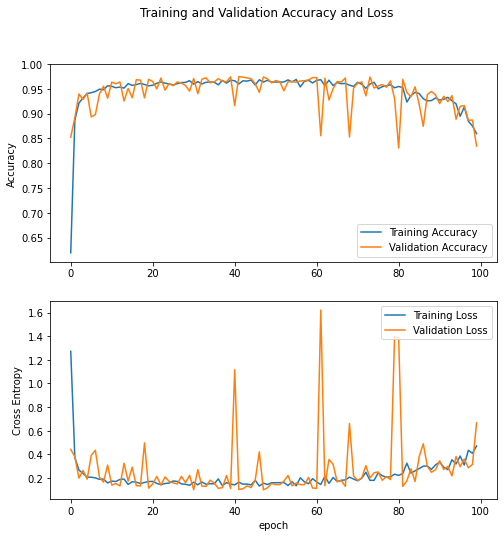

In [248]:
# draw loss and acc
acc = num_history.history['accuracy']
val_acc = num_history.history['val_accuracy']
loss = num_history.history['loss']
val_loss = num_history.history['val_loss']

# 
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.suptitle('Training and Validation Accuracy and Loss')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.suptitle('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [151]:
# load model
test_num_cnn_model = tf.keras.models.load_model('models/cnn_num_gpu.h5')
loss, accuracy = test_num_cnn_model.evaluate(test_num_ds)
print('cnn test accuracy: ', accuracy)

380/380 [==============================] - 2s 5ms/step - loss: 0.0771 - accuracy: 0.9837
cnn test accuracy:  0.9837064146995544
